In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
# Load Data
df = pd.read_csv("train.csv")
test_df = pd.read_csv("formulatedtest.csv")

In [14]:
# Drop columns only if they exist
columns_to_drop = ['Alley', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

test_columns_to_drop = ['SalePrice']
test_df.drop(columns=[col for col in test_columns_to_drop if col in test_df.columns], axis=1, inplace=True)

In [15]:
# Combine train and test before encoding
full_data = pd.concat([df, test_df], axis=0)

In [16]:
# Perform one-hot encoding
full_data = pd.get_dummies(full_data, drop_first=True)

In [17]:
# Split the data back
df = full_data.iloc[:len(df), :]
test_df = full_data.iloc[len(df):, :]

In [18]:
# Model Training
df_Train = df.iloc[:1422, :]
df_Test = df.iloc[1422:, :]
X_train = df_Train.drop(['SalePrice'], axis=1)
y_train = df_Train['SalePrice']

regressor = RandomForestRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions={},
                               cv=5, n_iter=10,
                               scoring='neg_mean_absolute_error',
                               n_jobs=-1, verbose=5, return_train_score=True, random_state=42)

random_cv.fit(X_train, y_train)

C:\Users\anish\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={}, random_state=42,
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=5)

In [19]:
# Ensure test_df has the same features as X_train
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)

In [20]:
# Predictions
y_pred = random_cv.best_estimator_.predict(test_df)

In [21]:
# Model Evaluation on Training Data
y_train_pred = random_cv.best_estimator_.predict(X_train)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Model Performance:
Mean Absolute Error (MAE): 6542.128037974684
Mean Squared Error (MSE): 126369093.27007237
Root Mean Squared Error (RMSE): 11241.400858881974
R² Score: 0.980119779819407


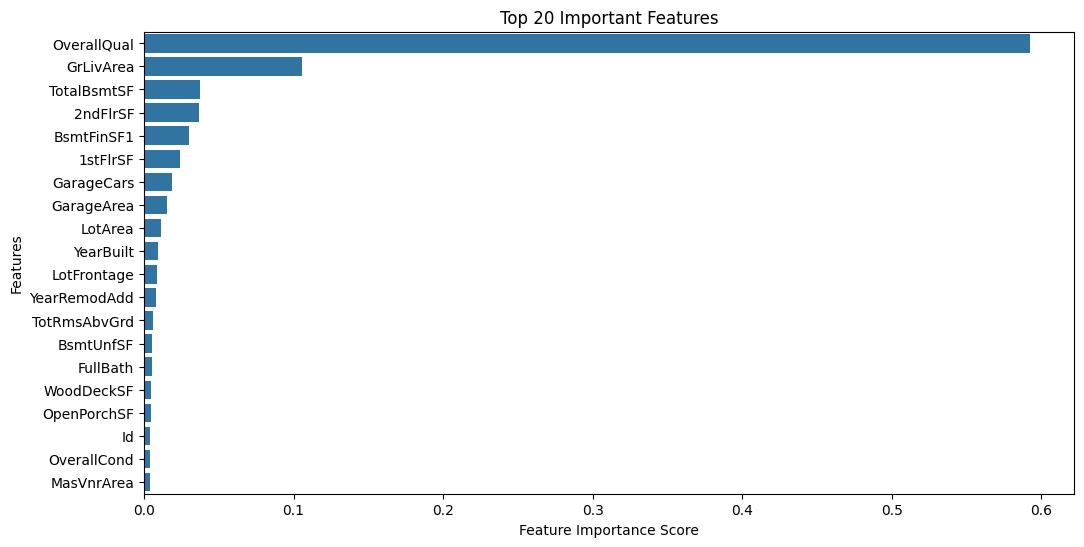

In [22]:
# Feature Importance
feature_importances = pd.Series(random_cv.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Important Features")
plt.show()

In [23]:
# Display Output
y_pred[:5]

array([126872.  , 157118.72, 178849.4 , 184340.57, 203845.4 ])